In [1]:
import rebound
sim=rebound.Simulation()
sim.add(m=1.)
#sim.add(m=1, a=300, e=0.05)
#sim.move_to_com()
sim.integrator="whfast"
sim.dt=0.05
sim.status()


---------------------------------
REBOUND version:     	3.24.3
REBOUND built on:    	Jun  7 2023 11:11:24
Number of particles: 	1
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.050000
---------------------------------
<rebound.particle.Particle object at 0x7f1064775ac0, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
---------------------------------


In [2]:
import matplotlib.pyplot as plt

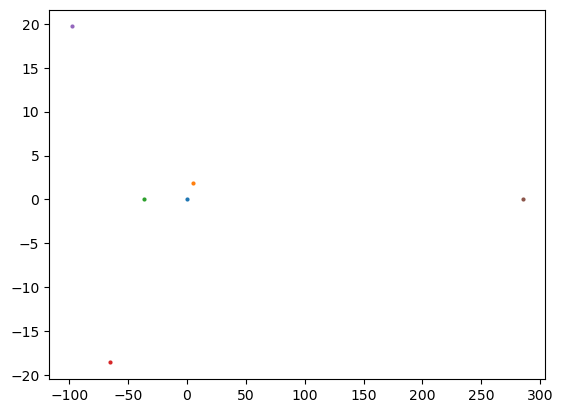

In [3]:
import numpy as np
Testparticle= 4
a_initial=np.linspace(5,100,Testparticle)
for a in a_initial:
    sim.add(a=a,f=np.random.rand()*2.*np.pi)

sim.add(m=1, a=300,e=0.05)

sim.N_active=2
for i in range(sim.N):
    plt.scatter(sim.particles[i].x, sim.particles[i].y,marker=".",linewidth=0)

In [4]:
Time=100.*2*np.pi
N_out=10
xy=np.zeros((N_out,Testparticle,2))
times=np.linspace(0,Time,N_out)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    for j, p in enumerate(sim.particles[1:-1]):
        xy[i][j]=[p.x,p.y]

/home/jeremiah-r1/Software/rebound/rebound/simulation.py:1032: RuntimeWarning: At least one test particle (type 0) has finite mass. This might lead to unexpected behaviour. Set testparticle_hidewarnings=1 to hide this warning.
  warnings.warn(msg[1:], RuntimeWarning)


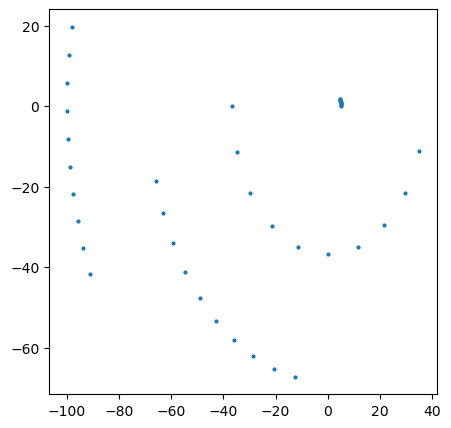

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
#ax.set_xlim([-4,4])
#ax.set_ylim([-4,4])
plt.scatter(xy[:,:,0],xy[:,:,1],marker=".",linewidth=0)

In [6]:
xy.shape

(10, 4, 2)

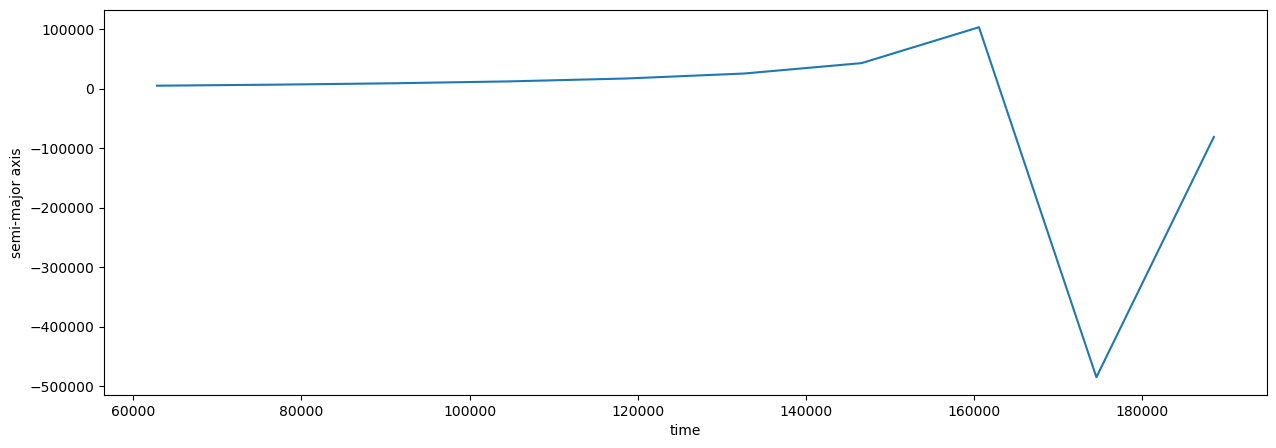

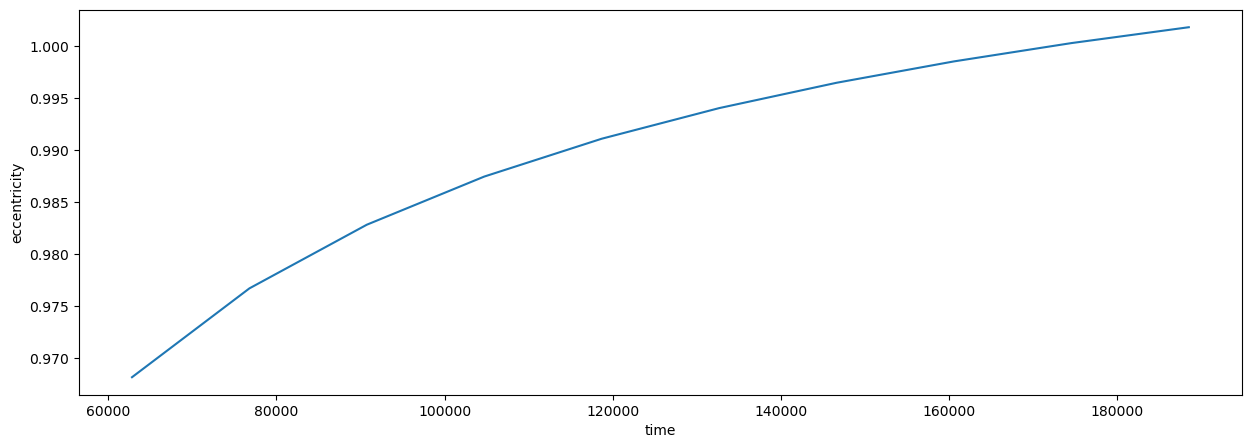

In [15]:
times = np.linspace(100.*Time, 300.*Time, N_out)
a = np.zeros(N_out)
e = np.zeros(N_out)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    a[i] = sim.particles[5].a
    e[i] = sim.particles[5].e
    
fig = plt.figure(figsize=(15,5))

ax = plt.subplot()
ax.set_xlabel("time")
ax.set_ylabel("semi-major axis")
plt.plot(times, a);

fig = plt.figure(figsize=(15,5))
ax = plt.subplot()
ax.set_xlabel("time")
ax.set_ylabel("eccentricity")
plt.plot(times, e);

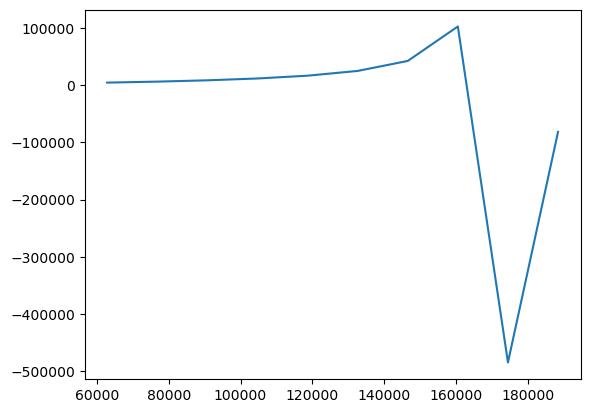

In [16]:
plt.plot(times,a)